Dataset has 2 classes: ['horses', 'humans']
Number of training examples: 103
Number of test examples: 51

--- Model Summary ---


c:\Users\lilha\OneDrive\Pictures\Desktop\5th-sem-Practicals\VirtualEnviorment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.4563 - loss: 0.7554 - val_accuracy: 0.6863 - val_loss: 0.6527
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7379 - loss: 0.6163 - val_accuracy: 0.8039 - val_loss: 0.5013
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9029 - loss: 0.3915 - val_accuracy: 0.7647 - val_loss: 0.4224
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8252 - loss: 0.3410 - val_accuracy: 0.8824 - val_loss: 0.2385
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9223 - loss: 0.1530 - val_accuracy: 0.9412 - val_loss: 0.1607
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9320 - loss: 0.1814 - val_accuracy: 0.9020 - val_loss: 0.2117
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9223 - loss: 0.1855 - val_accuracy: 0.9412 - val_loss: 0.1691
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9417 - loss: 0.1113 -

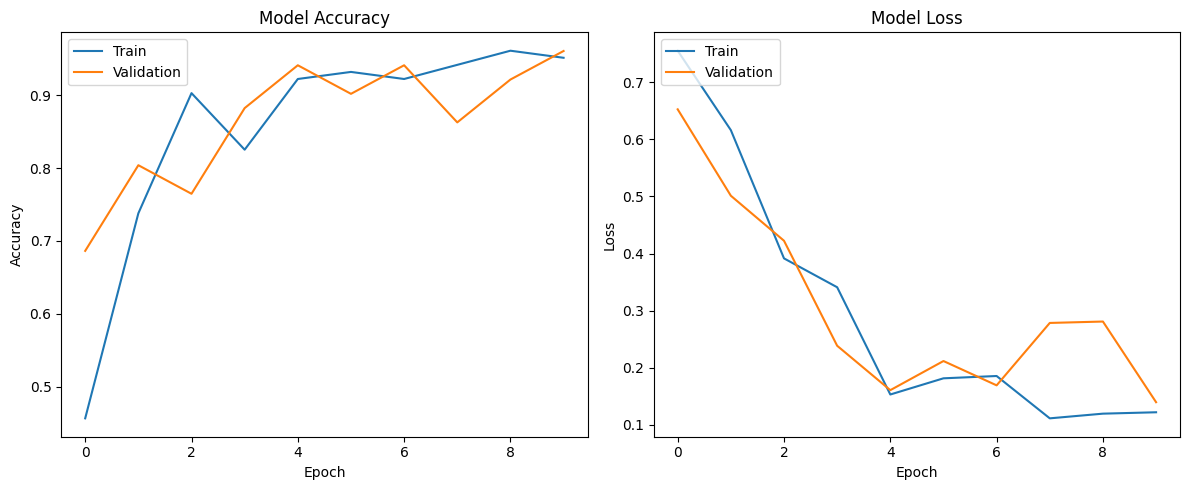

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

##Data Loading and Preprocessin
(train_ds, test_ds), ds_info = tfds.load(
    'horses_or_humans',
    # Use only 10% of data for training and 5% for testing for a quick run
    split=['train[:10%]', 'train[10%:15%]'],
    shuffle_files=True,
    as_supervised=True,  # Returns (image, label) tuples
    with_info=True
)

# Define key parameters
IMG_SIZE = 128
CHANNELS = 3
NUM_CLASSES = 1  # For binary classification, we use 1 output neuron.

print(f"Dataset has {ds_info.features['label'].num_classes} classes: {ds_info.features['label'].names}")
print(f"Number of training examples: {tf.data.experimental.cardinality(train_ds)}")
print(f"Number of test examples: {tf.data.experimental.cardinality(test_ds)}\n")

# Create a preprocessing function for resizing and normalization
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize to [0,1] range
    return image, label

# Apply the preprocessing to the datasets
train_dataset = train_ds.map(preprocess_image)
test_dataset = test_ds.map(preprocess_image)

# Create efficient data pipelines
# Shuffle, batch, and prefetch the data for performance
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

##Model Building for Binary Classification
model = tf.keras.models.Sequential([
    # The input_shape must match our new resized images (128, 128, 3)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # The final layer for binary classification
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
])

# Compile the model with binary-specific loss function and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("--- Model Summary ---")
model.summary()

##Model Training 
print("\n--- Starting Model Training ---")
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
print("Model training completed.\n")

##Model Evaluation 
print("--- Evaluating Model ---")
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}\n')

y_true = []
y_pred_prob = []

# Iterate over the test dataset to get true labels and predictions
for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred_prob.extend(model.predict(images))

# Convert predictions from probabilities to class labels (0 or 1)
y_pred = (np.array(y_pred_prob) > 0.5).astype(int)
y_true = np.array(y_true)

print("--- Classification Report ---")
class_names = ['horse', 'human']
print(classification_report(y_true, y_pred, target_names=class_names))

##Visualize Training Results 
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
